# Homework 1

In [24]:
import numpy as np
import numpy.polynomial as poly
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd


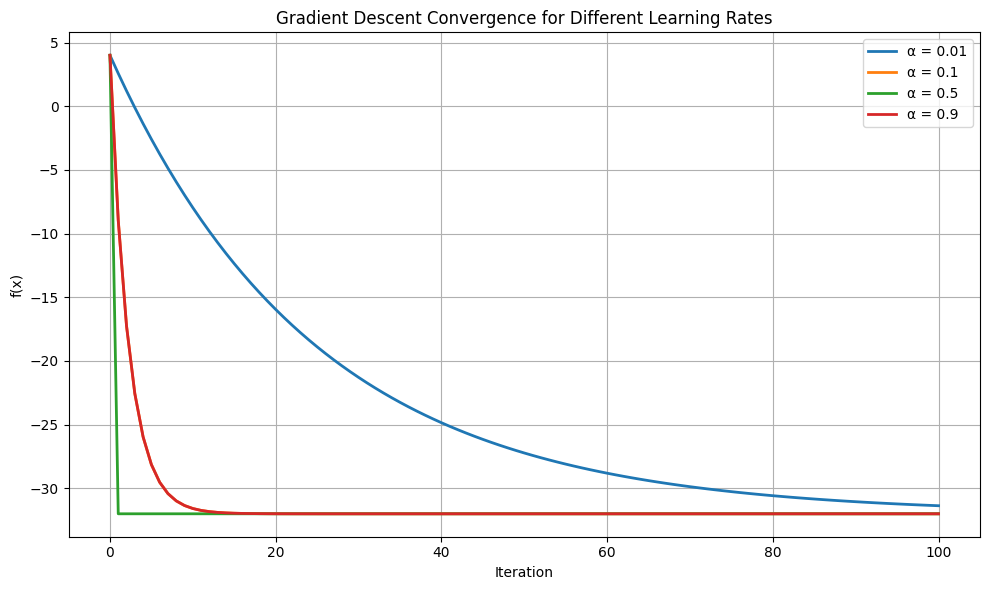

α = 0.01 | final x = 5.2042826646 | final f(x) = -31.3668339222
α = 0.10 | final x = 5.9999999988 | final f(x) = -32.0000000000
α = 0.50 | final x = 6.0000000000 | final f(x) = -32.0000000000
α = 0.90 | final x = 5.9999999988 | final f(x) = -32.0000000000


In [28]:

def gradient_descent(coef, x_start, learning_rate, num_iterations):
    """
    f: function to minimize
    df: derivative of f
    x_start: starting point
    learning_rate: step size
    num_iterations: number of iterations to run
    
    Returns: (x_history, f_history) - lists of x values and f(x) values
    """
    # Your implementation here
    # delete this and the following line in your implementation. (do not delete the return)
    f = poly.Polynomial(coef)
    df = f.deriv()
    x_history = [x_start]
    f_history = [f(x_start)]

    x = x_start
    for i in range(num_iterations):
        x -= learning_rate * float(df(x))
        x_history.append(float(x))
        f_history.append(float(f(x)))

    return x_history, f_history


# function2(x) = x^2 - 12x + 4
coef_f2 = [4, -12, 1]
learning_rates = [0.01, 0.1, 0.5, 0.9]

plt.figure(figsize=(10, 6))

results = {}
for lr in learning_rates:
    x_hist, f_hist = gradient_descent(coef_f2, x_start=0.0, learning_rate=lr, num_iterations=100)
    results[lr] = (x_hist, f_hist)
    plt.plot(range(len(f_hist)), f_hist, linewidth=2, label=f"α = {lr}")

plt.xlabel("Iteration")
plt.ylabel("f(x)")
plt.title("Gradient Descent Convergence for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# print final values again for convenience
for lr in learning_rates:
    x_hist, f_hist = results[lr]
    print(f"α = {lr:0.2f} | final x = {x_hist[-1]:.10f} | final f(x) = {f_hist[-1]:.10f}")


